In [146]:
#Install Packages

#pip install openpyxl
#pip install pandas
#pip install matplotlib
#pip install scipy
#pip install simplejson

In [147]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import datetime
import json
import pickle
import matplotlib.pyplot as plt

In [148]:
# Load variables from the DataAnalysis file

with open('Cooling_DataAnalysisVariables.pkl', 'rb') as f:
    data = pickle.load(f)

In [149]:
# Load variables from the Global_Variables file

with open('Global_Variables.pkl', 'rb') as f:
    Global_Variables = pickle.load(f)

In [150]:
#Assumptions from CHE Report

#BTC Mining
#Basis_MW = data['Basis_MW'] #MW
#Hardware_Eff = data['Hardware_Eff'] #Percentage
#W_from_Renewables = data['W_from_Renewables'] #GW
#P_from_Renewables = data['P_from_Renewables'] #GW
#P_from_Solar = data['P_from_Solar']
#Solar_Surplus = data['Solar_Surplus'] #Percentage of excess energy produced by Solar Energy
#Solar_Plant_W = data['Solar_Plant_W'] #GW

#Solar Plant
#PV_Capacity = data['PV_Capacity'] #MW Maximum capacity
#Capital_Cost_PV = data['Capital_Cost_PV'] #$/MW
#PV_Plant_Cost = data['PV_Plant_Cost'] #$

#Calculations based on Assumptions
#W_from_Solar = data['W_from_Solar']
#Global_W = data['Global_W']

#Date of data extraction from Blockchain.com
last_date = Global_Variables['last_date']

In [151]:
#Calculated in Data Analysis file
NumberofRigsPerModel_10 = data['NumberofRigsPerModel_10']
NumberofRigsPerModel_20 = data['NumberofRigsPerModel_20']
NumberofRigsPerModel_30 = data['NumberofRigsPerModel_30']
NumberofRigsPerModel_40 = data['NumberofRigsPerModel_40']
NumberofRigsPerModel_50 = data['NumberofRigsPerModel_50']

df_10_copy =  data['df_10_copy']
df_20_copy =  data['df_20_copy']
df_30_copy =  data['df_30_copy']
df_40_copy =  data['df_40_copy']
df_50_copy =  data['df_50_copy']

In [152]:
#Data used as basis
Crypto_Data = Global_Variables['Crypto_Data']
ASIC_df = Crypto_Data

#Bitcoin Data
hashrate_BTC = Global_Variables['hashrate_BTC']
revenue_BTC = Global_Variables['revenue_BTC']

#JSON file paths
file_paths = [hashrate_BTC,revenue_BTC]

In [153]:
ASIC_df = ASIC_df[ASIC_df['Rig Type'] == 'ASIC']

In [154]:
def calculate_asics_metrics(df, rigs_per_model):

    # Map the number of rigs per model
    df['NumberOfRigs'] = df['Model'].map(rigs_per_model)

    # Calculate total hashrate
    df['Total Hashrate (Th/s)'] = df['Hashrate (Th/s)'] * df['NumberOfRigs']

    # Calculate capital cost (in thousands of dollars)
    df['CapitalCost (000 $)'] = df['NumberOfRigs'] * df['Price ($)'] / 1000

    return df

ASIC_df_10 = ASIC_df.copy()
ASIC_df_20 = ASIC_df.copy()
ASIC_df_30 = ASIC_df.copy()
ASIC_df_40 = ASIC_df.copy()
ASIC_df_50 = ASIC_df.copy()

ASIC_df_10 = calculate_asics_metrics(ASIC_df_10, NumberofRigsPerModel_10)
ASIC_df_20 = calculate_asics_metrics(ASIC_df_20, NumberofRigsPerModel_20)
ASIC_df_30 = calculate_asics_metrics(ASIC_df_30, NumberofRigsPerModel_30)
ASIC_df_40 = calculate_asics_metrics(ASIC_df_40, NumberofRigsPerModel_40)
ASIC_df_50 = calculate_asics_metrics(ASIC_df_50, NumberofRigsPerModel_50)

In [155]:
ASIC_df_20.head(3)

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $)
0,MicroBT WhatsMiner M63S,01-Nov-23,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC,29569,11531910.0,368104.481
1,Bitmain Antminer S21 Hyd (335Th),01-Feb-24,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC,39801,13333335.0,234388.089
2,MicroBT WhatsMiner M63,01-Nov-23,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC,32100,10721400.0,220815.900


In [156]:
ASIC_df_50.head(3)

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $)
0,MicroBT WhatsMiner M63S,01-Nov-23,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC,18481,7207590.0,230069.969
1,Bitmain Antminer S21 Hyd (335Th),01-Feb-24,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC,24876,8333460.0,146494.764
2,MicroBT WhatsMiner M63,01-Nov-23,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC,20063,6701042.0,138013.377


In [157]:
ASIC_df.columns

Index(['Model', 'Release', 'Hashrate (Th/s)', 'Power (W)', 'Algorithm',
       'Income ($/day)', 'Electricity Cost ($/day)', 'With Electricity',
       'Without Electricity', 'Efficiency (j/Gh)', 'Price ($)', 'Noise db',
       'Cooling', 'Seller', 'Days to Breakeven', 'Rig Type'],
      dtype='object')

In [158]:
temp_ASIC_df = ASIC_df.copy()

In [159]:
old_column_names = ['Release', 'Hashrate (Th/s)', 'Power (W)', 'Algorithm',
       'Income ($/day)', 'Electricity Cost ($/day)',
       'With Electricity', 'Without Electricity',
       'Efficiency (j/Gh)', 'Price ($)', 'Noise db', 'Cooling', 'Seller',
       'Days to Breakeven', 'NumberOfRigs',
       'Total Hashrate (Th/s)', 'CapitalCost (000 $)']

new_column_names = ['Release', 'Hashrate(Th/s)','Power(W)','Algorithm',
        'Income($/day)','ElectricityCost($/day)',
        'WithElectricity','WithoutElectricity',
        'Efficiency(j/Gh)','Price($)','Noisedb','Cooling','Seller',
        'DaystoBreakeven','NumberOfRigs',
        'TotalHashrate(Th/s)','CapitalCost(000)']

In [160]:
def create_column_dicts(df, old_column_names, new_column_names, index_column='Model'):

    df[new_column_names] = df[old_column_names]

    column_dicts = {}
    for col in new_column_names:
        dict_name = f"dict_{col}"
        column_dicts[dict_name] = df.set_index(index_column)[col].to_dict()

    for name, dictionary in column_dicts.items():
        print(f"{name} -> {dictionary}")

    return column_dicts

dicts_10 = create_column_dicts(ASIC_df_10, old_column_names, new_column_names, index_column='Model')
dicts_20 = create_column_dicts(ASIC_df_20, old_column_names, new_column_names, index_column='Model')
dicts_30 = create_column_dicts(ASIC_df_30, old_column_names, new_column_names, index_column='Model')
dicts_40 = create_column_dicts(ASIC_df_40, old_column_names, new_column_names, index_column='Model')
dicts_50 = create_column_dicts(ASIC_df_50, old_column_names, new_column_names, index_column='Model')

dict_Release -> {'MicroBT WhatsMiner M63S': '01-Nov-23', 'Bitmain Antminer S21 Hyd (335Th)': '01-Feb-24', 'MicroBT WhatsMiner M63': '01-Nov-23', 'MicroBT WhatsMiner M66S': '01-Nov-23', 'Bitmain Antminer S21 Pro (234Th)': '01-Jul-24', 'Bitmain Antminer S21 (200Th)': '01-Feb-24', 'Bitmain Antminer T21 (190Th)': '01-Feb-24', 'MicroBT WhatsMiner M60S': '01-Feb-24', 'Canaan Avalon A1566': '01-Oct-24', 'MicroBT WhatsMiner M60': '01-Feb-24', 'Bitmain Antminer S19j Pro (104Th)': '01-Jul-21', 'Bitmain Antminer S19 Pro (110Th)': '01-May-20'}
dict_Hashrate(Th/s) -> {'MicroBT WhatsMiner M63S': 390.0, 'Bitmain Antminer S21 Hyd (335Th)': 335.0, 'MicroBT WhatsMiner M63': 334.0, 'MicroBT WhatsMiner M66S': 298.0, 'Bitmain Antminer S21 Pro (234Th)': 234.0, 'Bitmain Antminer S21 (200Th)': 200.0, 'Bitmain Antminer T21 (190Th)': 190.0, 'MicroBT WhatsMiner M60S': 186.0, 'Canaan Avalon A1566': 185.0, 'MicroBT WhatsMiner M60': 172.0, 'Bitmain Antminer S19j Pro (104Th)': 104.0, 'Bitmain Antminer S19 Pro (110Th

In [161]:
#Function to read JSON files
def read_and_print_json(file_path):

    with open(file_path, 'r') as file:
        json_data = json.load(file)

    print(json_data)
    
    return json_data

In [162]:
#Function to convert json data to Dataframe
def process_data(category_y,category_x,json_data):
    time_series_data = json_data[category_y]

    df = pd.DataFrame(time_series_data)
    df[category_x] = df['x']
    df[category_y] = df['y']
    return df

In [163]:
#Function to add column with dates to the data
def add_dates(df,last_date):

    num_rows = df.shape[0]
    dates = pd.date_range(end=last_date, periods=num_rows)
    df['Date'] = dates

    return df

In [164]:
#Function to plot graphs for data visualization
def plot_graph(df,y_data,title,y_label):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    x = df['Date']
    y = df[y_data]

    plt.plot(x, y,label=y_data, color='red')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()


{'metric1': 'miners-revenue', 'metric2': 'market-price', 'miners-revenue': [{'x': 1698451200000, 'y': 31018704.384994347}, {'x': 1698537600000, 'y': 31869663.034045357}, {'x': 1698624000000, 'y': 32053239.592004847}, {'x': 1698710400000, 'y': 32663988.681133866}, {'x': 1698796800000, 'y': 33441948.513665527}, {'x': 1698883200000, 'y': 33470161.096744664}, {'x': 1698969600000, 'y': 33484481.368150137}, {'x': 1699056000000, 'y': 32987416.154812064}, {'x': 1699142400000, 'y': 33831315.08251717}, {'x': 1699228800000, 'y': 34970491.281359695}, {'x': 1699315200000, 'y': 34304247.065032534}, {'x': 1699401600000, 'y': 34048475.964370735}, {'x': 1699488000000, 'y': 34650644.88509359}, {'x': 1699574400000, 'y': 35941397.8715662}, {'x': 1699660800000, 'y': 37521879.87848707}, {'x': 1699747200000, 'y': 37752398.46864532}, {'x': 1699833600000, 'y': 38600137.92737014}, {'x': 1699920000000, 'y': 38808396.61609398}, {'x': 1700006400000, 'y': 39203968.35652012}, {'x': 1700092800000, 'y': 39445757.50334

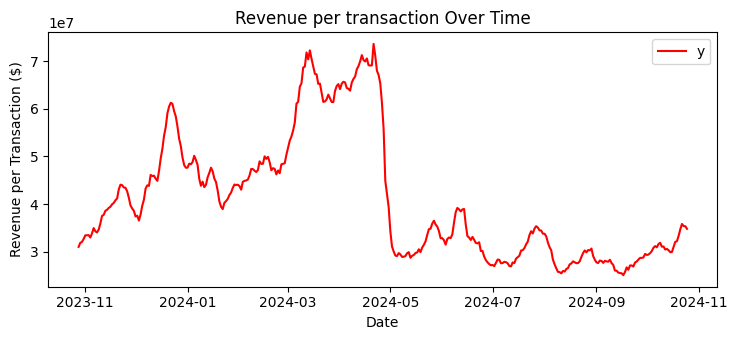

In [165]:
#Daily transaction_revenue to BTC miners across the globe
file_path = revenue_BTC
json_data = read_and_print_json(file_path)

category_y = 'miners-revenue'
category_x = 'Revenue (USD)'
df_revenue = process_data(category_y,category_x,json_data)

df_revenue = add_dates(df_revenue,last_date)

print(df_revenue.head())

y_data = 'y'
title = 'Revenue per transaction Over Time'
y_label = 'Revenue per Transaction ($)'
plot_graph(df_revenue,y_data,title,y_label)

{'metric1': 'hash-rate', 'metric2': 'market-price', 'hash-rate': [{'x': 1698451200000, 'y': 448143230.48629}, {'x': 1698537600000, 'y': 452477304.2820955}, {'x': 1698624000000, 'y': 445542786.2088067}, {'x': 1698710400000, 'y': 446432116.97122365}, {'x': 1698796800000, 'y': 460578041.84067196}, {'x': 1698883200000, 'y': 464261140.1474795}, {'x': 1698969600000, 'y': 463125882.7349779}, {'x': 1699056000000, 'y': 456708337.497233}, {'x': 1699142400000, 'y': 461884981.20968944}, {'x': 1699228800000, 'y': 474812083.2106728}, {'x': 1699315200000, 'y': 462212744.476483}, {'x': 1699401600000, 'y': 452453934.13244975}, {'x': 1699488000000, 'y': 452453934.13244975}, {'x': 1699574400000, 'y': 452010351.8440846}, {'x': 1699660800000, 'y': 459994833.0346573}, {'x': 1699747200000, 'y': 456446174.72773606}, {'x': 1699833600000, 'y': 456439922.31436163}, {'x': 1699920000000, 'y': 455681828.07999325}, {'x': 1700006400000, 'y': 460070558.7815174}, {'x': 1700092800000, 'y': 461955101.49630696}, {'x': 170

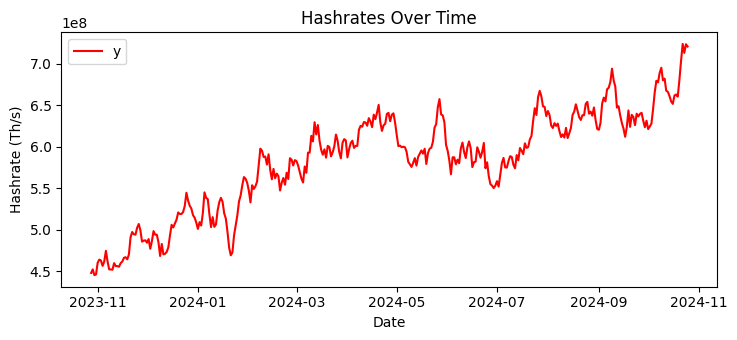

In [166]:
#Daily hasrates to BTC miners across the globe
file_path = hashrate_BTC
json_data = read_and_print_json(file_path)

category_y = 'hash-rate'
category_x = 'Revenue (USD)'
df_hr = process_data(category_y,category_x,json_data)

df_hr = add_dates(df_hr,last_date)

print(df_hr.head())

y_data = 'y'
title = 'Hashrates Over Time'
y_label = 'Hashrate (Th/s)'
plot_graph(df_hr,y_data,title,y_label)

In [167]:
#hash-rate in Th/s
#miners-revenue in USD

df = pd.merge(df_hr[['Date', 'hash-rate']], df_revenue[['Date', 'miners-revenue']], on='Date', how='inner')

df.head()


,Date,hash-rate,miners-revenue
0,2023-10-28,4.481432e+08,3.101870e+07
1,2023-10-29,4.524773e+08,3.186966e+07
2,2023-10-30,4.455428e+08,3.205324e+07
3,2023-10-31,4.464321e+08,3.266399e+07
4,2023-11-01,4.605780e+08,3.344195e+07


In [168]:
df.tail()

,Date,hash-rate,miners-revenue
359,2024-10-21,7.027137e+08,3.471964e+07
360,2024-10-22,7.236317e+08,3.583560e+07
361,2024-10-23,7.128173e+08,3.537913e+07
362,2024-10-24,7.232393e+08,3.535770e+07
363,2024-10-25,7.204847e+08,3.481178e+07


In [169]:
df['revenue per hashrate'] = df['miners-revenue'] /df['hash-rate']
df.head()

,Date,hash-rate,miners-revenue,revenue per hashrate
0,2023-10-28,4.481432e+08,3.101870e+07,0.069216
1,2023-10-29,4.524773e+08,3.186966e+07,0.070434
2,2023-10-30,4.455428e+08,3.205324e+07,0.071942
3,2023-10-31,4.464321e+08,3.266399e+07,0.073167
4,2023-11-01,4.605780e+08,3.344195e+07,0.072609


In [170]:
dict_Hashrate = dicts_10['dict_Hashrate(Th/s)']

In [171]:
df_20_copy.head()

,Date,Hour,Energy for Mining (MW),MicroBT WhatsMiner M63S,Bitmain Antminer S21 Hyd (335Th),MicroBT WhatsMiner M63,MicroBT WhatsMiner M66S,Bitmain Antminer S21 Pro (234Th),Bitmain Antminer S21 (200Th),Bitmain Antminer T21 (190Th),MicroBT WhatsMiner M60S,Canaan Avalon A1566,MicroBT WhatsMiner M60,Bitmain Antminer S19j Pro (104Th),Bitmain Antminer S19 Pro (110Th)
0,2024-01-01,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2024-01-01,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0
2,2024-01-01,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,2024-01-01,3,0.0,0,0,0,0,0,0,0,0,0,0,0,0
4,2024-01-01,4,0.0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
def calculate_hashrate_total_per_model(df, hashrate_dict):
    for column in df.columns:
        if column in dict_Hashrate: 
            df[column] = df[column] * hashrate_dict[column]
    return df
    
    
df_10 = df_10_copy.copy()
df_20 = df_20_copy.copy()
df_30 = df_30_copy.copy()
df_40 = df_40_copy.copy()
df_50 = df_50_copy.copy()


hashrate_total_10 = calculate_hashrate_total_per_model(df_10,dicts_10['dict_Hashrate(Th/s)'])
hashrate_total_20 = calculate_hashrate_total_per_model(df_20,dicts_20['dict_Hashrate(Th/s)'])
hashrate_total_30 = calculate_hashrate_total_per_model(df_30,dicts_30['dict_Hashrate(Th/s)'])
hashrate_total_40 = calculate_hashrate_total_per_model(df_40,dicts_40['dict_Hashrate(Th/s)'])
hashrate_total_50 = calculate_hashrate_total_per_model(df_50,dicts_50['dict_Hashrate(Th/s)'])


In [173]:
hashrate_total_20.head()

,Date,Hour,Energy for Mining (MW),MicroBT WhatsMiner M63S,Bitmain Antminer S21 Hyd (335Th),MicroBT WhatsMiner M63,MicroBT WhatsMiner M66S,Bitmain Antminer S21 Pro (234Th),Bitmain Antminer S21 (200Th),Bitmain Antminer T21 (190Th),MicroBT WhatsMiner M60S,Canaan Avalon A1566,MicroBT WhatsMiner M60,Bitmain Antminer S19j Pro (104Th),Bitmain Antminer S19 Pro (110Th)
0,2024-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-01-01,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-01,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-01,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-01-01,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
# Sum up all the daily revenues per model

def sum_hashrates_data(df, date_column="Date"):
    df[date_column] = pd.to_datetime(df[date_column])
    df = df.groupby(date_column, as_index=False).sum()
    return df

hashrate_total_10 = sum_hashrates_data(hashrate_total_10)
hashrate_total_20 = sum_hashrates_data(hashrate_total_20)
hashrate_total_30 = sum_hashrates_data(hashrate_total_30)
hashrate_total_40 = sum_hashrates_data(hashrate_total_40)
hashrate_total_50 = sum_hashrates_data(hashrate_total_50)

hashrate_total_20.head()

,Date,Hour,Energy for Mining (MW),MicroBT WhatsMiner M63S,Bitmain Antminer S21 Hyd (335Th),MicroBT WhatsMiner M63,MicroBT WhatsMiner M66S,Bitmain Antminer S21 Pro (234Th),Bitmain Antminer S21 (200Th),Bitmain Antminer T21 (190Th),MicroBT WhatsMiner M60S,Canaan Avalon A1566,MicroBT WhatsMiner M60,Bitmain Antminer S19j Pro (104Th),Bitmain Antminer S19 Pro (110Th)
0,2024-01-01,276,1257.492550,67974270.0,78594685.0,63197142.0,67974098.0,83335122.0,70845400.0,66184790.0,67973142.0,68023205.0,63206216.0,42627312.0,42561860.0
1,2024-01-02,276,1253.528621,67760160.0,78347120.0,62998412.0,67759538.0,83072340.0,70622000.0,65976360.0,67759242.0,67808790.0,63007040.0,42493048.0,42427550.0
2,2024-01-03,276,1326.071222,71681610.0,82880675.0,66644690.0,71681218.0,87880104.0,74709000.0,69794030.0,71680122.0,71732825.0,66653096.0,44952024.0,44882860.0
3,2024-01-04,276,1296.623519,70089240.0,81040520.0,65164736.0,70089004.0,85928778.0,73050000.0,68244200.0,70088706.0,70139790.0,65172864.0,43953832.0,43886260.0
4,2024-01-05,276,1321.343383,71426160.0,82585875.0,66406214.0,71424938.0,87566544.0,74442800.0,69545130.0,71424930.0,71477155.0,66415564.0,44791760.0,44722920.0


In [175]:
# Assume that hourly 'revenue per hashrate' stays constant per hour
df_new = df.copy()
df_new['revenue per hashrate'] = df_new['revenue per hashrate']/24

In [176]:
def merge_and_multiply(df_copy, df_new, merge_column="Date", multiplier_column="revenue per hashrate"):

    # Merge both DataFrames
    merged_df = df_copy.merge(df_new[[merge_column, multiplier_column]], on=merge_column, how='left')

    # Multiply each column except the specified ones
    for column in merged_df.columns:
        if column not in [merge_column, multiplier_column]:
            merged_df[column] = merged_df[column] * merged_df[multiplier_column]
    
    return merged_df


revenue_10 = merge_and_multiply(hashrate_total_10, df_new)
revenue_20 = merge_and_multiply(hashrate_total_20, df_new)
revenue_30 = merge_and_multiply(hashrate_total_30, df_new)
revenue_40 = merge_and_multiply(hashrate_total_40, df_new)
revenue_50 = merge_and_multiply(hashrate_total_50, df_new)

revenue_20.head()


,Date,Hour,Energy for Mining (MW),MicroBT WhatsMiner M63S,Bitmain Antminer S21 Hyd (335Th),MicroBT WhatsMiner M63,MicroBT WhatsMiner M66S,Bitmain Antminer S21 Pro (234Th),Bitmain Antminer S21 (200Th),Bitmain Antminer T21 (190Th),MicroBT WhatsMiner M60S,Canaan Avalon A1566,MicroBT WhatsMiner M60,Bitmain Antminer S19j Pro (104Th),Bitmain Antminer S19 Pro (110Th),revenue per hashrate
0,2024-01-01,1.093477,4.982027,269305.484884,311382.229676,250379.106235,269304.803442,330163.243211,280680.539840,262215.790812,269301.015890,269499.359182,250415.056279,168884.034024,168624.721455,0.003962
1,2024-01-02,1.094810,4.972377,268784.507023,310779.845058,249896.061530,268782.039733,329523.394782,280136.579592,261708.700183,268780.865589,268977.407845,249930.286254,168557.349312,168297.538125,0.003967
2,2024-01-03,1.100711,5.288484,285872.331038,330535.150651,265784.667526,285870.767709,350473.296880,297945.818732,278344.502148,285866.396768,286076.580795,265818.191366,179272.478475,178996.646585,0.003988
3,2024-01-04,1.079306,5.070484,274086.013869,316911.313187,254828.597586,274085.090984,336026.988431,285664.152060,266870.931225,274083.925646,274283.691116,254860.382366,171882.739878,171618.497604,0.003911
4,2024-01-05,1.057781,5.064103,273743.702783,316513.770585,254504.552788,273739.019417,335602.389859,285305.099945,266534.577761,273738.988757,273939.143222,254540.387048,171666.266765,171402.434627,0.003833


In [177]:

def calculate_yearly_revenue(df, hashrate_dict):

    model_sums = {model: df[model].sum() for model in hashrate_dict.keys()}
    yearly_revenue_df = pd.DataFrame(list(model_sums.items()), columns=['Model', 'Annual_Sum'])
    return yearly_revenue_df



yearly_revenue_10 = calculate_yearly_revenue(revenue_10,dicts_10['dict_Hashrate(Th/s)']) 
yearly_revenue_20 = calculate_yearly_revenue(revenue_20,dicts_20['dict_Hashrate(Th/s)']) 
yearly_revenue_30 = calculate_yearly_revenue(revenue_30,dicts_30['dict_Hashrate(Th/s)']) 
yearly_revenue_40 = calculate_yearly_revenue(revenue_40,dicts_40['dict_Hashrate(Th/s)']) 
yearly_revenue_50 = calculate_yearly_revenue(revenue_50,dicts_50['dict_Hashrate(Th/s)']) 


In [178]:

yearly_revenue_20.head()


,Model,Annual_Sum
0,MicroBT WhatsMiner M63S,3.993124e+07
1,Bitmain Antminer S21 Hyd (335Th),4.617012e+07
2,MicroBT WhatsMiner M63,3.712527e+07
3,MicroBT WhatsMiner M66S,3.993095e+07
4,Bitmain Antminer S21 Pro (234Th),4.895488e+07


In [179]:
ASIC_df.head(3)

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type
0,MicroBT WhatsMiner M63S,01-Nov-23,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC
1,Bitmain Antminer S21 Hyd (335Th),01-Feb-24,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC
2,MicroBT WhatsMiner M63,01-Nov-23,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC


In [180]:
dicts_20['dict_CapitalCost(000)']

{'MicroBT WhatsMiner M63S': 368104.481,
 'Bitmain Antminer S21 Hyd (335Th)': 234388.089,
 'MicroBT WhatsMiner M63': 220815.9,
 'MicroBT WhatsMiner M66S': 373387.353,
 'Bitmain Antminer S21 Pro (234Th)': 303842.122,
 'Bitmain Antminer S21 (200Th)': 177217.206,
 'Bitmain Antminer T21 (190Th)': 186684.264,
 'MicroBT WhatsMiner M60S': 237390.342,
 'Canaan Avalon A1566': 334330.85493000003,
 'MicroBT WhatsMiner M60': 207536.518,
 'Bitmain Antminer S19j Pro (104Th)': 53541.95,
 'Bitmain Antminer S19 Pro (110Th)': 53301.304}

In [181]:
def calculate_capital_cost_and_payback(df, capital_cost_dict, capital_cost_column='Capital_Cost ($000)'):

    # Map capital cost in thousands
    df[capital_cost_column] = df['Model'].map(capital_cost_dict)
    
    # Calculate capital cost in dollars
    df['Capital_Cost'] = df[capital_cost_column] * 1000

    # Calculate payback period
    df['Payback_Period'] = df['Capital_Cost'] / df['Annual_Sum']

    return df


payback_10 = calculate_capital_cost_and_payback(yearly_revenue_10,dicts_10['dict_CapitalCost(000)'],'Capital_Cost ($000)')
payback_20 = calculate_capital_cost_and_payback(yearly_revenue_20,dicts_20['dict_CapitalCost(000)'],'Capital_Cost ($000)')
payback_30 = calculate_capital_cost_and_payback(yearly_revenue_30,dicts_30['dict_CapitalCost(000)'],'Capital_Cost ($000)')
payback_40 = calculate_capital_cost_and_payback(yearly_revenue_40,dicts_40['dict_CapitalCost(000)'],'Capital_Cost ($000)')
payback_50 = calculate_capital_cost_and_payback(yearly_revenue_50,dicts_50['dict_CapitalCost(000)'],'Capital_Cost ($000)')

In [182]:
payback_10.head()

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
0,MicroBT WhatsMiner M63S,4.492250e+07,414115.985,414115985.0,9.218454
1,Bitmain Antminer S21 Hyd (335Th),5.194128e+07,263691.753,263691753.0,5.076728
2,MicroBT WhatsMiner M63,4.176580e+07,248414.448,248414448.0,5.947796
3,MicroBT WhatsMiner M66S,4.492222e+07,420059.566,420059566.0,9.350818
4,Bitmain Antminer S21 Pro (234Th),5.507414e+07,341821.130,341821130.0,6.206563


In [183]:
payback_20.head()

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
0,MicroBT WhatsMiner M63S,3.993124e+07,368104.481,368104481.0,9.218459
1,Bitmain Antminer S21 Hyd (335Th),4.617012e+07,234388.089,234388089.0,5.076619
2,MicroBT WhatsMiner M63,3.712527e+07,220815.900,220815900.0,5.947860
3,MicroBT WhatsMiner M66S,3.993095e+07,373387.353,373387353.0,9.350825
4,Bitmain Antminer S21 Pro (234Th),4.895488e+07,303842.122,303842122.0,6.206575


In [184]:
payback_30.head()

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
0,MicroBT WhatsMiner M63S,3.494003e+07,322092.977,322092977.0,9.218452
1,Bitmain Antminer S21 Hyd (335Th),4.039899e+07,205090.314,205090314.0,5.076620
2,MicroBT WhatsMiner M63,3.248476e+07,193217.352,193217352.0,5.947939
3,MicroBT WhatsMiner M66S,3.493972e+07,326715.140,326715140.0,9.350823
4,Bitmain Antminer S21 Pro (234Th),4.283562e+07,265863.114,265863114.0,6.206590


In [185]:
payback_40.head()

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
0,MicroBT WhatsMiner M63S,2.994877e+07,276081.473,276081473.0,9.218459
1,Bitmain Antminer S21 Hyd (335Th),3.462787e+07,175792.539,175792539.0,5.076620
2,MicroBT WhatsMiner M63,2.784422e+07,165611.925,165611925.0,5.947803
3,MicroBT WhatsMiner M66S,2.994847e+07,280042.927,280042927.0,9.350826
4,Bitmain Antminer S21 Pro (234Th),3.671634e+07,227879.077,227879077.0,6.206476


In [186]:
payback_50.head()

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
0,MicroBT WhatsMiner M63S,2.495752e+07,230069.969,230069969.0,9.218463
1,Bitmain Antminer S21 Hyd (335Th),2.885673e+07,146494.764,146494764.0,5.076624
2,MicroBT WhatsMiner M63,2.320367e+07,138013.377,138013377.0,5.947911
3,MicroBT WhatsMiner M66S,2.495720e+07,233370.714,233370714.0,9.350839
4,Bitmain Antminer S21 Pro (234Th),3.059706e+07,189900.069,189900069.0,6.206481


In [187]:
def merge_payback_period(asic_df, revenue_df):

    asic_df = asic_df.merge(revenue_df[['Model', 'Payback_Period']], on='Model')
    return asic_df

results_10 = merge_payback_period(ASIC_df_10,payback_10)
results_20 = merge_payback_period(ASIC_df_20,payback_20)
results_30 = merge_payback_period(ASIC_df_30,payback_30)
results_40 = merge_payback_period(ASIC_df_40,payback_40)
results_50 = merge_payback_period(ASIC_df_50,payback_50)


In [188]:
def find_minimum_payback_model(df, payback_column='Payback_Period', model_column='Model', release_column='Release'):

    # Identify the row with the minimum payback period
    min_payback_idx = df[payback_column].idxmin()
    min_payback_row = df.loc[min_payback_idx]

    # Extract relevant information
    min_payback_info = {
        'Model': min_payback_row[model_column],
        'Release Date': min_payback_row[release_column],
        'Minimum Payback Period': min_payback_row[payback_column]
    }

    # Display the model with the minimum payback period
    print(f"Model with minimum payback period: {min_payback_info['Model']}")
    print(f"Release Date of Model with minimum payback period: {min_payback_info['Release Date']}")
    print(f"Minimum payback period: {min_payback_info['Minimum Payback Period']}")

    return min_payback_info

find_minimum_payback_model(results_10, payback_column='Payback_Period', model_column='Model', release_column='Release')
find_minimum_payback_model(results_20, payback_column='Payback_Period', model_column='Model', release_column='Release')
find_minimum_payback_model(results_30, payback_column='Payback_Period', model_column='Model', release_column='Release')
find_minimum_payback_model(results_40, payback_column='Payback_Period', model_column='Model', release_column='Release')
find_minimum_payback_model(results_50, payback_column='Payback_Period', model_column='Model', release_column='Release')


Model with minimum payback period: Bitmain Antminer S19 Pro (110Th)
Release Date of Model with minimum payback period: 01-May-20
Minimum payback period: 2.1318196563869445
Model with minimum payback period: Bitmain Antminer S19 Pro (110Th)
Release Date of Model with minimum payback period: 01-May-20
Minimum payback period: 2.131822730738389
Model with minimum payback period: Bitmain Antminer S19 Pro (110Th)
Release Date of Model with minimum payback period: 01-May-20
Minimum payback period: 2.1317921771709027
Model with minimum payback period: Bitmain Antminer S19 Pro (110Th)
Release Date of Model with minimum payback period: 01-May-20
Minimum payback period: 2.131793044180294
Model with minimum payback period: Bitmain Antminer S19 Pro (110Th)
Release Date of Model with minimum payback period: 01-May-20
Minimum payback period: 2.1317921562274913


{'Model': 'Bitmain Antminer S19 Pro (110Th)',
 'Release Date': '01-May-20',
 'Minimum Payback Period': np.float64(2.1317921562274913)}

C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_22052\2773952530.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[release_column] = pd.to_datetime(df[release_column])


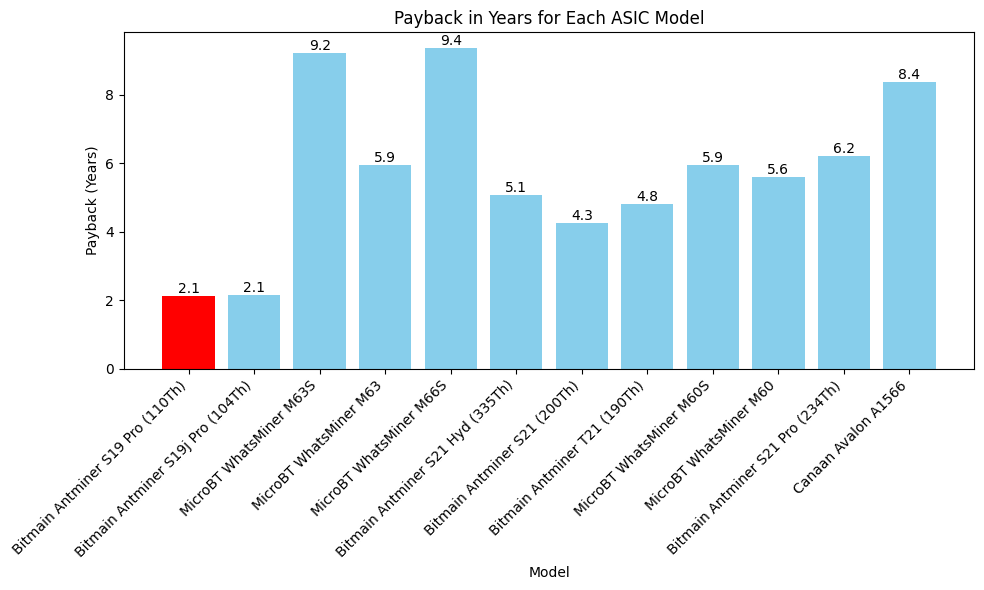

C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_22052\2773952530.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[release_column] = pd.to_datetime(df[release_column])


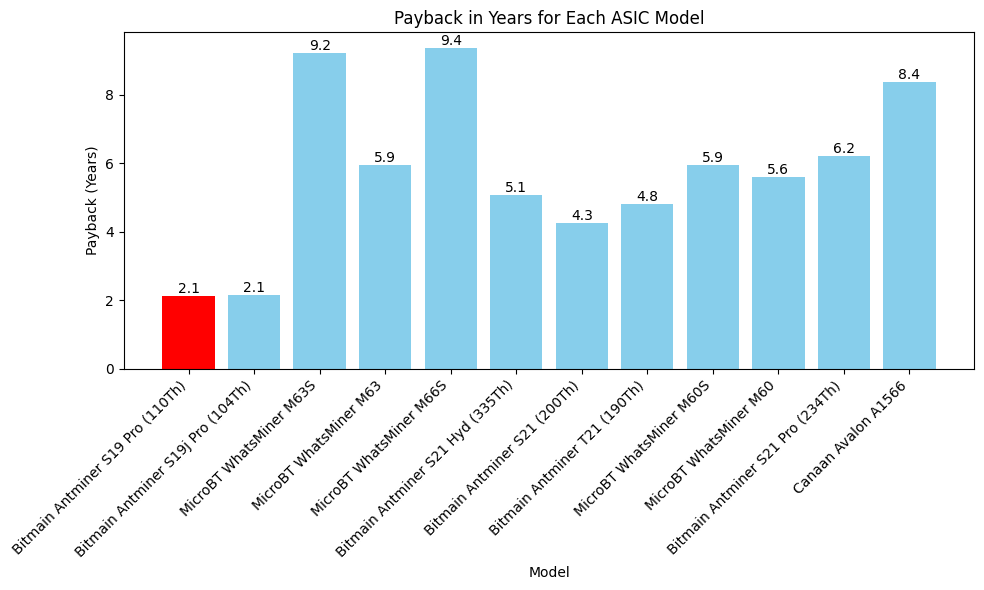

C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_22052\2773952530.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[release_column] = pd.to_datetime(df[release_column])


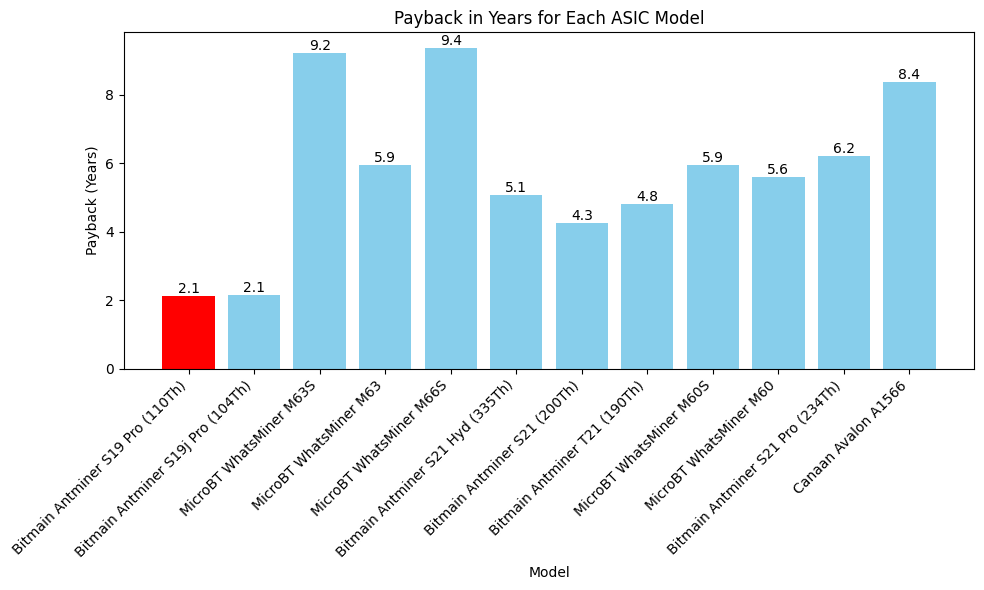

C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_22052\2773952530.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[release_column] = pd.to_datetime(df[release_column])


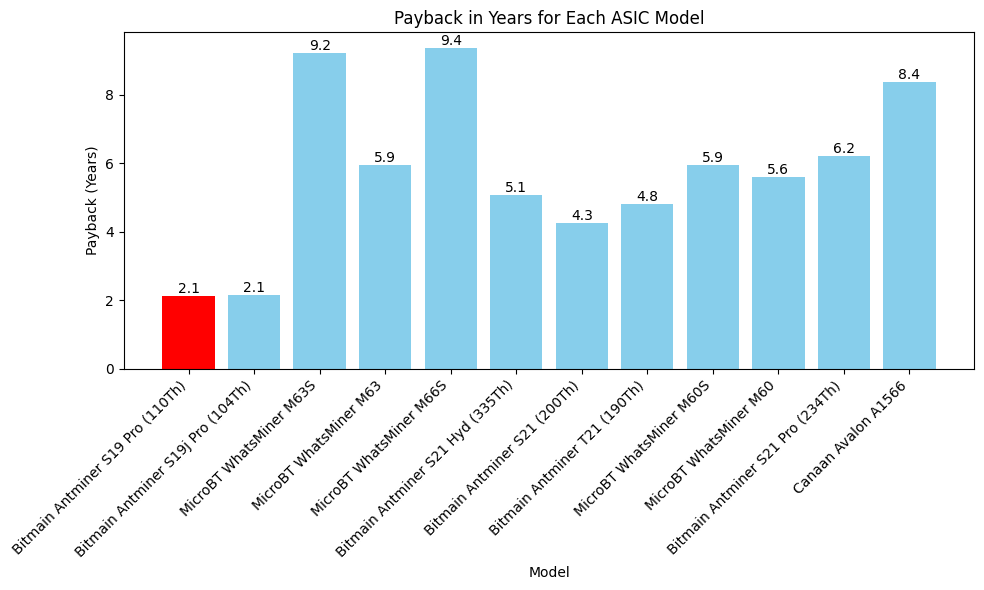

C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_22052\2773952530.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[release_column] = pd.to_datetime(df[release_column])


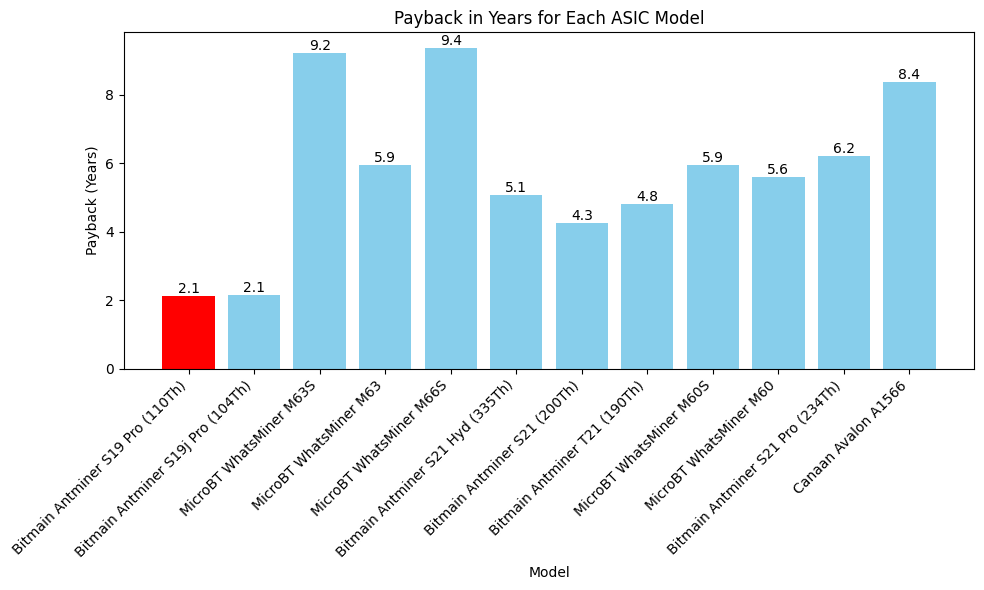

In [189]:
def plot_payback_period_by_release(df, release_column='Release', model_column='Model', payback_column='Payback_Period'):

    # Ensure the release column is in datetime format
    df[release_column] = pd.to_datetime(df[release_column])

    # Sort the DataFrame by release date
    df_sorted = df.sort_values(by=release_column)

    # Identify the index of the model with the minimum payback period
    min_payback_idx = df_sorted[payback_column].idxmin()

    # Define colors, highlighting the minimum payback period model
    colors = ['red' if i == min_payback_idx else 'skyblue' for i in df_sorted.index]

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_sorted[model_column], df_sorted[payback_column], color=colors)

    # Set labels and title
    plt.xlabel('Model')
    plt.ylabel('Payback (Years)')
    plt.title('Payback in Years for Each ASIC Model')

    # Add payback period values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom')

    # Rotate x-ticks for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_payback_period_by_release(results_10, release_column='Release', model_column='Model', payback_column='Payback_Period')
plot_payback_period_by_release(results_20, release_column='Release', model_column='Model', payback_column='Payback_Period')
plot_payback_period_by_release(results_30, release_column='Release', model_column='Model', payback_column='Payback_Period')
plot_payback_period_by_release(results_40, release_column='Release', model_column='Model', payback_column='Payback_Period')
plot_payback_period_by_release(results_50, release_column='Release', model_column='Model', payback_column='Payback_Period')



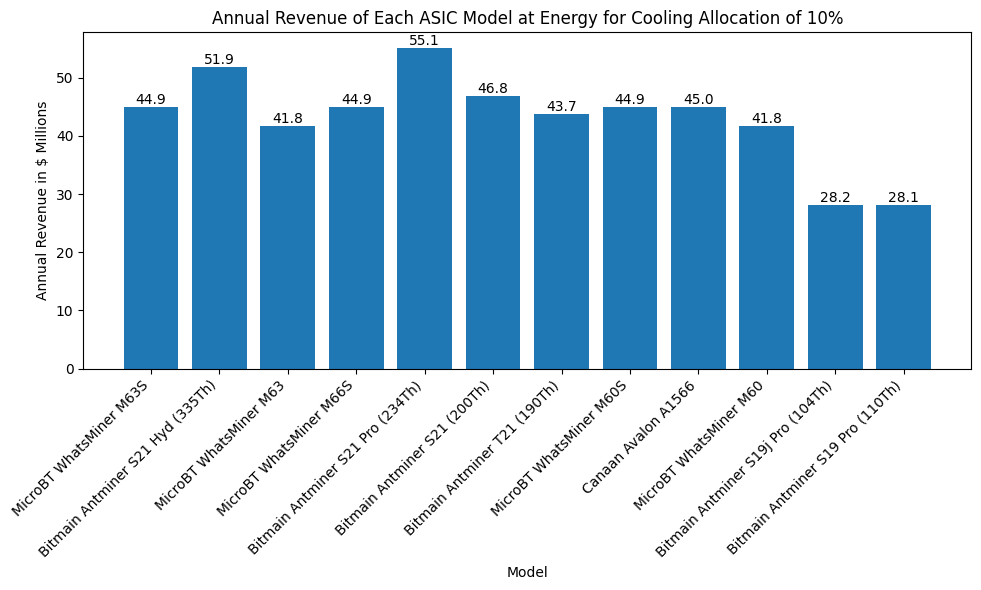

In [190]:
Yearly_revenue_perModel = yearly_revenue_10[yearly_revenue_10['Annual_Sum'] != 0]

# Plot the bar chart with models ordered by Release
plt.figure(figsize=(10, 6))
bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/1000000))
#bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/Capital_Cost_PV)*100, color=colors)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Annual Revenue in $ Millions')
plt.title('Annual Revenue of Each ASIC Model at Energy for Cooling Allocation of 10%')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom') 

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


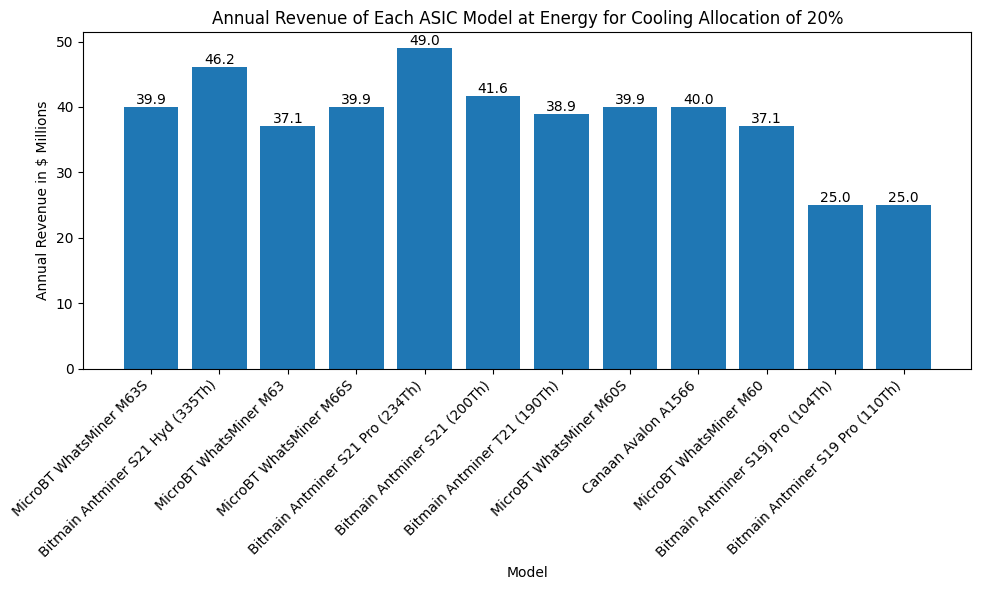

In [191]:
Yearly_revenue_perModel = yearly_revenue_20[yearly_revenue_20['Annual_Sum'] != 0]

# Plot the bar chart with models ordered by Release
plt.figure(figsize=(10, 6))
bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/1000000))
#bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/Capital_Cost_PV)*100, color=colors)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Annual Revenue in $ Millions')
plt.title('Annual Revenue of Each ASIC Model at Energy for Cooling Allocation of 20%')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom') 

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


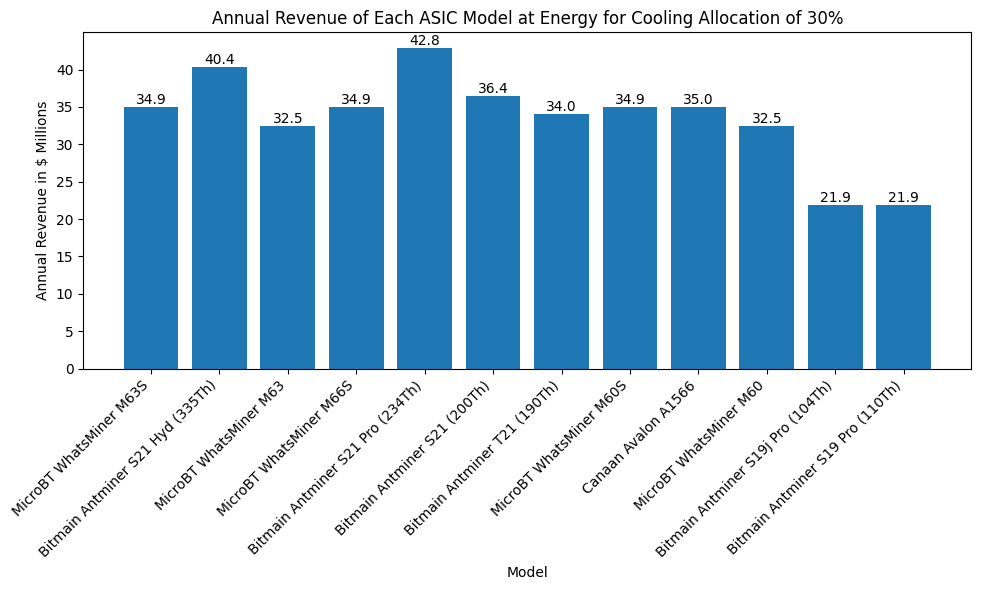

In [192]:
Yearly_revenue_perModel = yearly_revenue_30[yearly_revenue_30['Annual_Sum'] != 0]

# Plot the bar chart with models ordered by Release
plt.figure(figsize=(10, 6))
bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/1000000))
#bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/Capital_Cost_PV)*100, color=colors)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Annual Revenue in $ Millions')
plt.title('Annual Revenue of Each ASIC Model at Energy for Cooling Allocation of 30%')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom') 

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


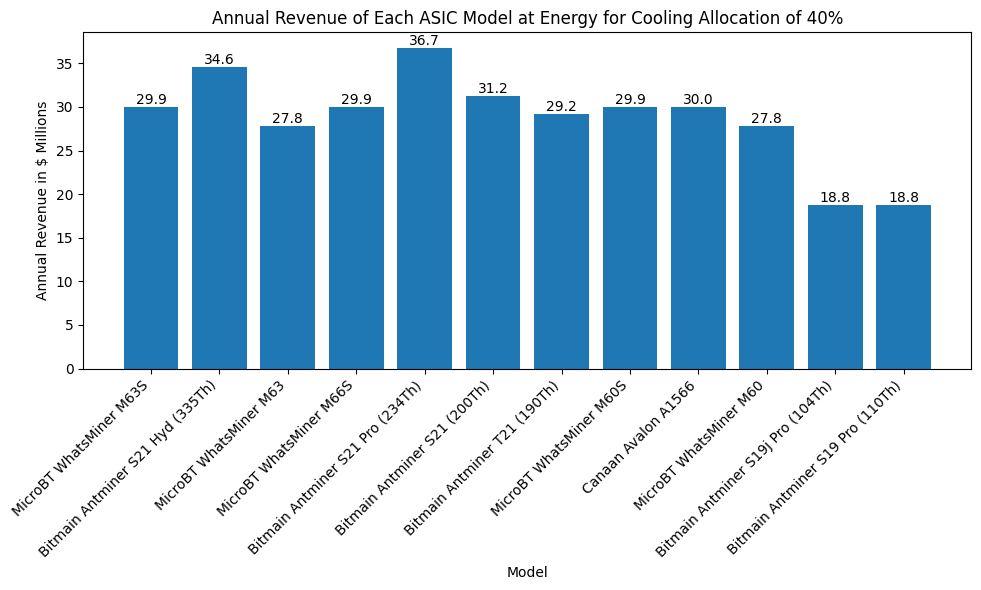

In [193]:
Yearly_revenue_perModel = yearly_revenue_40[yearly_revenue_40['Annual_Sum'] != 0]

# Plot the bar chart with models ordered by Release
plt.figure(figsize=(10, 6))
bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/1000000))
#bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/Capital_Cost_PV)*100, color=colors)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Annual Revenue in $ Millions')
plt.title('Annual Revenue of Each ASIC Model at Energy for Cooling Allocation of 40%')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom') 

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


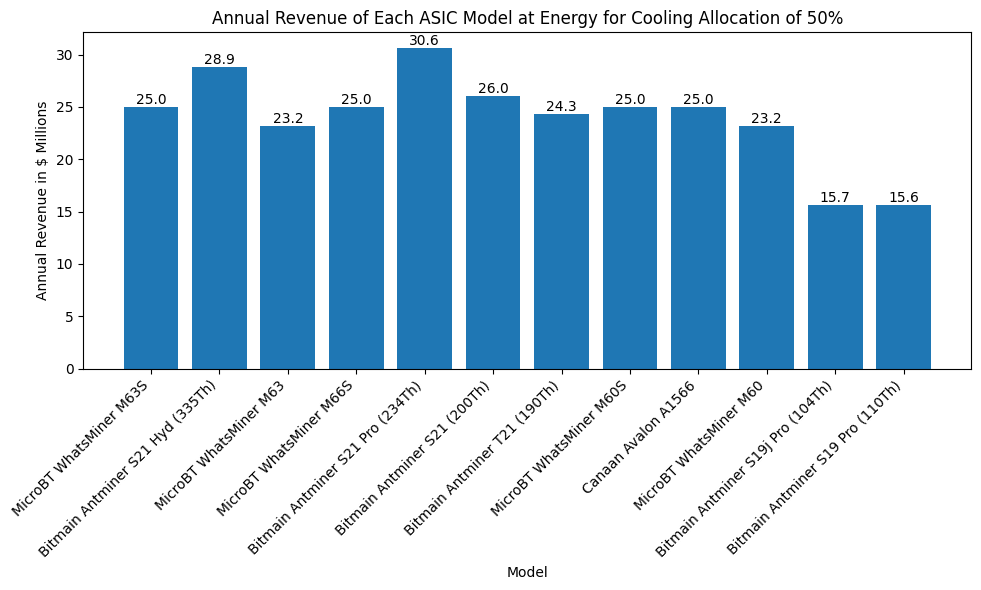

In [194]:
Yearly_revenue_perModel = yearly_revenue_50[yearly_revenue_50['Annual_Sum'] != 0]

# Plot the bar chart with models ordered by Release
plt.figure(figsize=(10, 6))
bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/1000000))
#bars = plt.bar(Yearly_revenue_perModel['Model'], ((Yearly_revenue_perModel['Annual_Sum'])/Capital_Cost_PV)*100, color=colors)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Annual Revenue in $ Millions')
plt.title('Annual Revenue of Each ASIC Model at Energy for Cooling Allocation of 50%')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom') 

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
